In [2]:
# Classification
#-> K nearest neighbour
# used for catergorical data

In [3]:
#Feature selection
# used for supervized data
#1. Continuous 2. categorial and continous 3. catergorical
# method used-
# Corelation            ANOVA                      Chi Square

In [4]:
#Feature extraction
#Used for unsupervized data
# Principle Component Analysis (PCA)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [6]:
# to find the category of the customers
df = pd.read_csv("C:\\Users\\sameer\\Desktop\\teleCust1000t.csv",delimiter = ',',encoding = 'ISO-8859-1')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [7]:
df['custcat'].value_counts() # (value counts give number of instances)      customer category 

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null int64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null int64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: int64(12)
memory usage: 93.8 KB


In [9]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E4C037D68>,
      dtype=object)

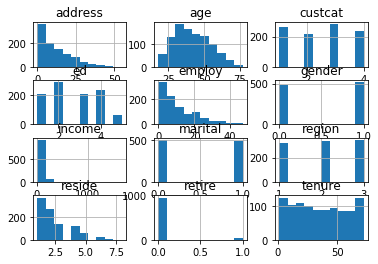

In [10]:
df.hist() # works on numerical data

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4]],
      dtype=int64)

In [13]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [14]:
# min max scaler range - (-1 to 1)
x = preprocessing.MinMaxScaler().fit_transform(X) # passing the values of 'X' and rescale the min and max range of variable
x # rescale the range b/w (-1 to 1) # formula = (X - x min)/(x max - x min)

array([[0.5       , 0.16901408, 0.44067797, ..., 0.        , 0.        ,
        0.14285714],
       [1.        , 0.14084507, 0.25423729, ..., 0.        , 0.        ,
        0.71428571],
       [1.        , 0.94366197, 0.57627119, ..., 0.        , 1.        ,
        0.14285714],
       ...,
       [1.        , 0.92957746, 0.69491525, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.97183099, 0.52542373, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.69014085, 0.30508475, ..., 0.        , 1.        ,
        0.28571429]])

In [15]:
# z scaler (-2 to 2)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5] # formula - Z = (X - mean)/standard deviation
# anyone can be used b/w min max or z scaler

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state = 4) # train-test split function of sklearn
print('Train set: ',X_train.shape, y_train.shape)
print('Test set: ',X_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k = 4 # assume value of k value range from (1-10)
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [19]:
# predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [20]:
neigh.score(X_train,y_train)

0.5475

In [24]:
neigh.score(X_test,y_test)

0.32

In [21]:
from sklearn import metrics

In [22]:
metrics.accuracy_score(y_test,yhat) # another way to find acuracy of the model

0.32

In [38]:
li = [] # predicting best value of 'k' by model.fit
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_test,y_test)
    z = neigh.score(X_train,y_train)
    li.append(z)
print(li)

[0.3125, 0.32875, 0.3575, 0.3475, 0.3625, 0.34875, 0.36125, 0.365, 0.36875]


In [40]:
# finding the best value of 'k' using metrics.accuracy
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfusionMx = []
for n in range(1,ks):
    # train model and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
print(mean_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]


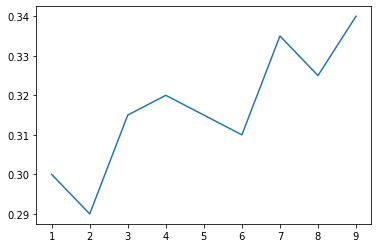

In [43]:
plt.plot(range(1,10), mean_acc) # peak value of 'k' comes at 9th value